In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,979 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이미지 분류 연습 - 머신러닝(KNN)

K-NN 알고리즘을 사용하여 이미지 분류하기

K-NN 알고리즘은 무엇인가?

거리 기반 알고리즘

In [12]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

import os


In [2]:
datadir = '/content/drive/MyDrive/project3/data/traindata/kfood'

food_middle_list = os.listdir(datadir)
food_middle_list = sorted(food_middle_list)
food_middle_list[:5]

['구이', '국', '기타', '김치', '나물']

In [3]:
food_list = [] # 음식이름
food_path_list = [] # 음식이름 경로

for food_middle in food_middle_list[:1]:
    middle_path = os.path.join(datadir,food_middle)
    food_name_list = os.listdir(middle_path)
    for food in food_name_list:
        path = os.path.join(middle_path,food)
        food_path_list.append(path)

        name = path.split('/')[-1]
        food_list.append(name)

print(len(food_list))
print(food_list)
print(food_path_list)

14
['갈비구이', '갈치구이', '고등어구이', '곱창구이', '장어구이', '떡갈비', '더덕구이', '불고기', '조개구이', '삼겹살', '조기구이', '닭갈비', '훈제오리', '황태구이']
['/content/drive/MyDrive/project3/data/traindata/kfood/구이/갈비구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/갈치구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/고등어구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/곱창구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/장어구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/떡갈비', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/더덕구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/불고기', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/조개구이', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/삼겹살', '/content/drive/MyDrive/project3/data/traindata/kfood/구이/조기구이', '/content/drive/MyDrive/project3/data

In [4]:
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '/content/drive/MyDrive/project3/data/traindata/kfood'
food_path_list = food_path_list[:5]

for idx, food_path in enumerate(food_path_list):
    food = food_path.split('/')[-1]

    for img in os.listdir(food_path)[:50]:
        img_path = os.path.join(food_path,img)
        img_matrix = imread(img_path)
        img_resized = resize(img_matrix,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(food)

In [5]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.035555,0.067790,0.079386,0.038809,0.072660,0.088959,0.042642,0.077935,0.097711,0.045234,...,0.030312,0.102698,0.135215,0.028054,0.098675,0.143395,0.025386,0.095974,0.137256,갈비구이
1,0.299977,0.211950,0.211785,0.292519,0.199310,0.200188,0.281326,0.197867,0.196121,0.248656,...,0.795894,0.776286,0.893933,0.795978,0.776153,0.894126,0.798889,0.771538,0.900800,갈비구이
2,0.979863,0.969571,0.933011,0.980987,0.969652,0.936143,0.981102,0.969651,0.934284,0.981266,...,0.832751,0.798062,0.726572,0.834946,0.794355,0.719898,0.834903,0.797140,0.720798,갈비구이
3,0.631304,0.585982,0.503807,0.615098,0.560471,0.467669,0.533000,0.477228,0.379763,0.494875,...,0.751416,0.742865,0.762377,0.730667,0.710659,0.723617,0.679076,0.655578,0.663483,갈비구이
4,0.763792,0.777083,0.760435,0.471623,0.482354,0.434299,0.650069,0.708279,0.645755,0.699220,...,0.101808,0.125153,0.172414,0.099667,0.128222,0.172722,0.092703,0.123876,0.167061,갈비구이


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

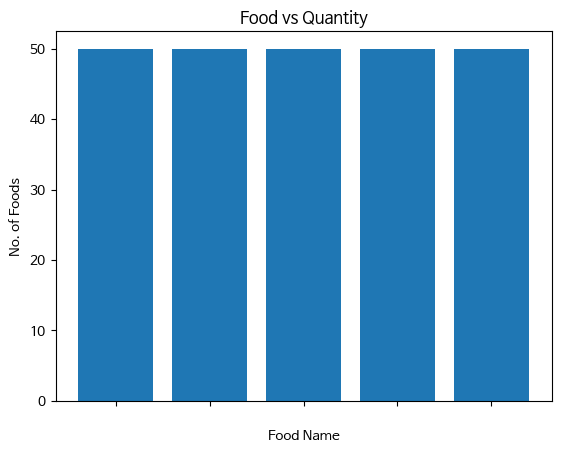

In [13]:
# Display of the number of images of each Food type
plt.bar(df['Target'].unique(),df['Target'].value_counts())
plt.title('Food vs Quantity')
plt.xlabel('Food Name')
plt.ylabel('No. of Foods')
plt.show()


In [14]:
# Input and Output
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

3) Classification of images using KNN Classification Algorithm

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# k=np.arange(1,160)
k = [i if i != 0 else 1 for i in range(0, 160, 5)]
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                         50, 55, 60, 65, 70, 75, 80, 85, 90, 95,
                                         100, 105, 110, 115, 120, 125, 130, 135,
                                         140, 145, ...]})

In [30]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': 55}

In [31]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
best_k = model_grid.best_params_['n_neighbors']
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=55)

In [20]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['갈비구이', '장어구이', '곱창구이', '곱창구이', '장어구이',
       '장어구이', '장어구이', '갈치구이', '고등어구이', '곱창구이',
       '장어구이', '장어구이', '고등어구이', '곱창구이',
       '곱창구이', '고등어구이', '갈비구이', '고등어구이',
       '장어구이', '고등어구이', '곱창구이', '갈치구이', '장어구이',
       '장어구이', '곱창구이', '갈비구이', '갈비구이', '곱창구이',
       '고등어구이', '갈치구이', '갈비구이', '곱창구이',
       '고등어구이', '고등어구이', '갈비구이', '곱창구이',
       '갈치구이', '장어구이', '곱창구이', '곱창구이',
       '고등어구이', '곱창구이', '갈치구이', '고등어구이',
       '갈치구이', '갈치구이', '고등어구이', '갈비구이', '곱창구이',
       '곱창구이', '갈치구이', '곱창구이', '곱창구이', '갈비구이',
       '곱창구이', '고등어구이', '장어구이', '곱창구이',
       '고등어구이', '곱창구이', '곱창구이', '갈치구이',
       '갈비구이'], dtype=object)

In [21]:
# Actual output
y_test

array(['장어구이', '고등어구이', '갈치구이', '곱창구이',
       '곱창구이', '곱창구이', '곱창구이', '갈치구이', '갈치구이',
       '곱창구이', '장어구이', '장어구이', '고등어구이',
       '곱창구이', '고등어구이', '갈치구이', '장어구이',
       '고등어구이', '곱창구이', '갈치구이', '곱창구이',
       '갈비구이', '장어구이', '고등어구이', '곱창구이', '갈치구이',
       '갈비구이', '갈치구이', '곱창구이', '갈비구이', '장어구이',
       '갈치구이', '고등어구이', '곱창구이', '곱창구이',
       '고등어구이', '고등어구이', '갈비구이', '갈비구이',
       '고등어구이', '고등어구이', '갈비구이', '고등어구이',
       '곱창구이', '갈치구이', '갈치구이', '곱창구이', '갈비구이',
       '갈치구이', '곱창구이', '갈치구이', '곱창구이', '곱창구이',
       '갈치구이', '갈치구이', '고등어구이', '장어구이', '갈비구이',
       '곱창구이', '갈비구이', '장어구이', '갈치구이', '갈비구이'],
      dtype=object)

In [22]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  39.682539682539684 %


# 4) Confusion matrix and Classification report

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[3, 2, 0, 1, 3],
       [2, 5, 2, 0, 0],
       [0, 3, 5, 5, 0],
       [4, 5, 3, 8, 1],
       [1, 0, 2, 4, 4]])

In [24]:
# Classification report
from sklearn import metrics
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n   갈비구이       0.33      0.30      0.32        10\n   갈치구이       0.56      0.33      0.42        15\n 고등어구이       0.38      0.42      0.40        12\n  곱창구이       0.38      0.44      0.41        18\n   장어구이       0.36      0.50      0.42         8\n\n    accuracy                           0.40        63\n   macro avg       0.40      0.40      0.39        63\nweighted avg       0.41      0.40      0.40        63\n'

# 5) Prediction for new image

In [ ]:
# # Resizing and flattening new image 1
# img1=imread('/content/drive/My Drive/images/New prediction images/plantsguru-flowering-plants-rose-red-800x800.jpg')
# img1_resize = resize(img1,(150,150,3))
# img1_flatten = img1_resize.flatten()


In [ ]:

# img1_pred = model.predict([img1_flatten])
# img1_pred

In [ ]:

# plt.imshow(img1)